In [68]:
# ライブラリのインポート
import pandas as pd
import lightgbm as lgb
import warnings
import gc
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
warnings.simplefilter('ignore')

In [69]:
# dataの読み込み
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
submit_df = pd.read_csv('submit_sample.csv',header=None)

In [70]:
# データの量の確認
train_df.shape,test_df.shape,submit_df.shape

((27100, 18), (18050, 17), (18050, 2))

In [71]:
# 訓練データ、テストデータがわかるようにダミーの目的変数を代入
test_df['y']=-999

In [72]:
# 訓練データ、テストデータを結合
all_df = pd.concat([train_df,test_df])
del train_df,test_df
gc.collect()

280

In [73]:
# カテゴリカラムの前処理
categorical_features = ['job', 'marital', 'education','default','housing','loan','contact','month','poutcome']
for col in categorical_features:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(all_df[col])
    lbl.transform(all_df[col])
    all_df[col]=lbl.transform(all_df[col])

In [74]:
# 訓練データ、テストデータの分割
train_df = all_df[all_df['y']!=-999]
test_df = all_df[all_df['y']==-999]

In [75]:
y_train = train_df['y']
X_train = train_df.drop(['y','id'], axis=1)
X_test = test_df.drop(['y','id'], axis=1)

In [76]:
# # 訓練データからデータを分割
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=0, stratify=y_train)

In [ ]:
# # 使用モデルはLGB（パラメータチューニング無）
# lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categorical_features)
# lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train, categorical_feature=categorical_features)

# params = {
#     'objective': 'binary',
#     'eval_metric': 'auc',
# }

# model = lgb.train(
#     params, lgb_train,
#     valid_sets=[lgb_train, lgb_eval],
#     verbose_eval=10,
#     num_boost_round=1000,
#     early_stopping_rounds=10
# )

# y_pred = model.predict(X_test, num_iteration=model.best_iteration)

In [85]:
# # 使用モデルはLGB（パラメータチューニング無）
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categorical_features)

params = {
    'objective': 'binary',
    'eval_metric': 'auc',
}

cv_results = lgb.cv(params, lgb_train, nfold=10)
cv_logloss = cv_results['multi_logloss-mean']

y_pred = model.predict(X_test, num_iteration=model.best_iteration)

{'binary_logloss-mean': [0.25611396190992497,
  0.2470291252659132,
  0.24065605153695208,
  0.2356552248249703,
  0.2316772387803014,
  0.22828252384510345,
  0.2255331548074389,
  0.22325946825348342,
  0.22131826597098664,
  0.21958857007960195,
  0.2181188581321591,
  0.21682345828288369,
  0.21563227988651928,
  0.2145673777976392,
  0.21342712687682983,
  0.2124641734954133,
  0.21157012583069673,
  0.21071351675624223,
  0.21008548335717508,
  0.20941154138414375,
  0.20893841470581304,
  0.208564197281788,
  0.20803857563041062,
  0.20772884977487815,
  0.20731119752600952,
  0.20681301593480012,
  0.20646850450002702,
  0.20612856551561948,
  0.20579283964891606,
  0.2054739425462667,
  0.20521598965454735,
  0.20490286148028924,
  0.20455108052891308,
  0.20441373034531055,
  0.20409136987583984,
  0.20393775318013746,
  0.2039221167582399,
  0.20371043329033486,
  0.2036603964010139,
  0.2035394782637791,
  0.2034886496550457,
  0.20338779644956118,
  0.2032814497380478,
  0

In [78]:
metrics.roc_auc_score(y_train, model.predict(X_train))
# 0.9256952027866905

0.9256952027866905

In [79]:
y_pred = model.predict(X_train)
# array([0.01272812, 0.89762624, 0.04006157, ..., 0.06539397, 0.31967064, 0.03496057])
y_pred

array([0.01272812, 0.89762624, 0.04006157, ..., 0.06539397, 0.31967064,
       0.03496057])

In [80]:
y_train.head()

23989    0
15432    1
11450    0
24052    0
10314    0
Name: y, dtype: int64

In [81]:
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

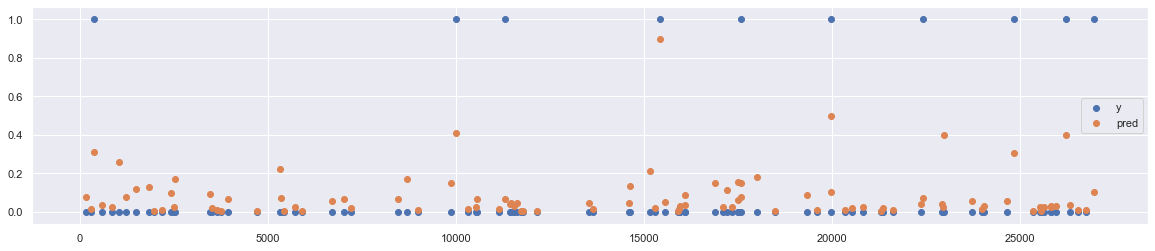

In [82]:
plt.figure(figsize=(20,4))
plt.scatter(y_train.index[:100], y_train[:100], label='y')
plt.scatter(y_train.index[:100], y_pred[:100], label='pred')
plt.legend()
plt.show()